In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2014-01-01'
end='2024-09-10'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,27.782366,27.839401,27.603037,27.724083,27.656164,73129082
2014-01-03,27.770908,27.818977,27.520098,27.521841,27.454418,66917888
2014-01-06,27.721344,27.867046,27.557707,27.828691,27.760517,71037271
2014-01-07,28.019974,28.385853,27.924334,28.365179,28.295691,102486711
2014-01-08,28.543015,28.575891,28.226450,28.424210,28.354576,90036218
...,...,...,...,...,...,...
2024-09-03,163.315002,163.380005,157.854996,158.610001,158.401489,26533100
2024-09-04,158.074997,160.399994,157.440002,157.809998,157.602539,17410700
2024-09-05,157.779999,161.014999,157.520004,158.600006,158.391510,14139500


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.656164,73129082
1,2014-01-03,27.770908,27.818977,27.520098,27.521841,27.454418,66917888
2,2014-01-06,27.721344,27.867046,27.557707,27.828691,27.760517,71037271
3,2014-01-07,28.019974,28.385853,27.924334,28.365179,28.295691,102486711
4,2014-01-08,28.543015,28.575891,28.226450,28.424210,28.354576,90036218
...,...,...,...,...,...,...,...
2684,2024-09-03,163.315002,163.380005,157.854996,158.610001,158.401489,26533100
2685,2024-09-04,158.074997,160.399994,157.440002,157.809998,157.602539,17410700
2686,2024-09-05,157.779999,161.014999,157.520004,158.600006,158.391510,14139500
2687,2024-09-06,158.690002,159.220001,151.934998,152.130005,151.930008,24999100


In [6]:
ma_100_days = data.Close.rolling(100).mean()
ma_100_days

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2684,172.7377
2685,172.7079
2686,172.7020
2687,172.6600


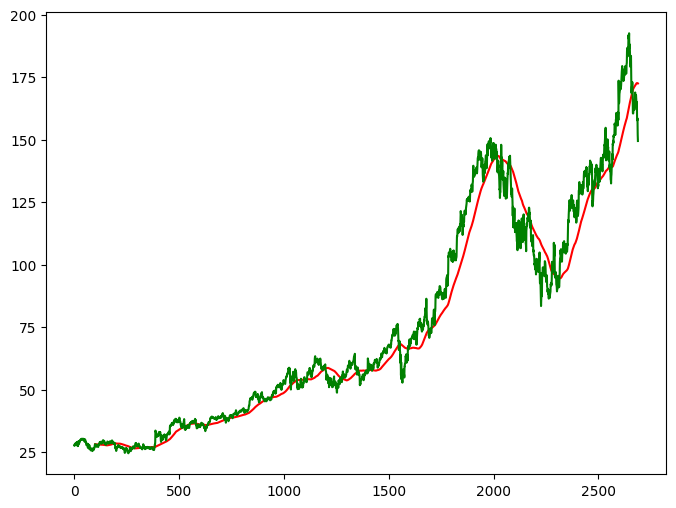

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()
ma_200_days

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2684,157.88600
2685,157.99315
2686,158.09265
2687,158.16860


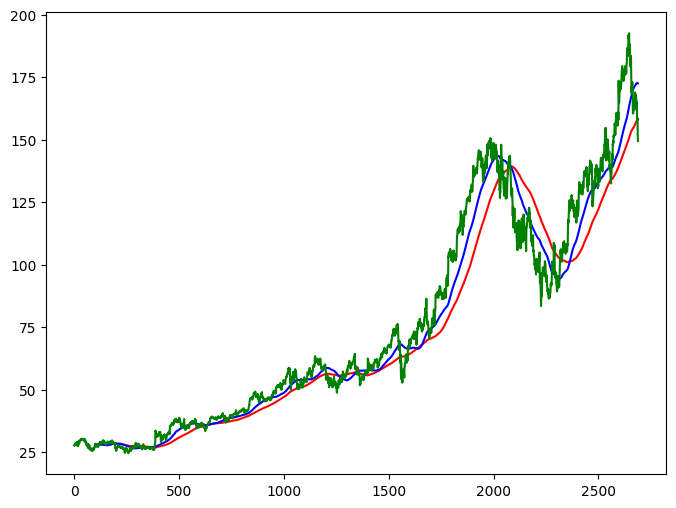

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days, 'r')
plt.plot(ma_100_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0], data_test.shape[0]

(2151, 538)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scalar.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x, y, epochs=1, batch_size=32, verbose=1)

65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 268ms/step - loss: 0.0611


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [21]:
pas_100_days = data_train.tail(100)

In [22]:
data_test=pd.concat([pas_100_days, data_test], ignore_index=True)

In [23]:
data_test_scale = scalar.fit_transform(data_test)

In [24]:
x=[]
y=[]

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x, y = np.array(x), np.array(y)

In [25]:
y_predict = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step


In [26]:
scale = 1/scalar.scale_

In [27]:
y_predict = y_predict * scale

In [28]:
y=y*scale


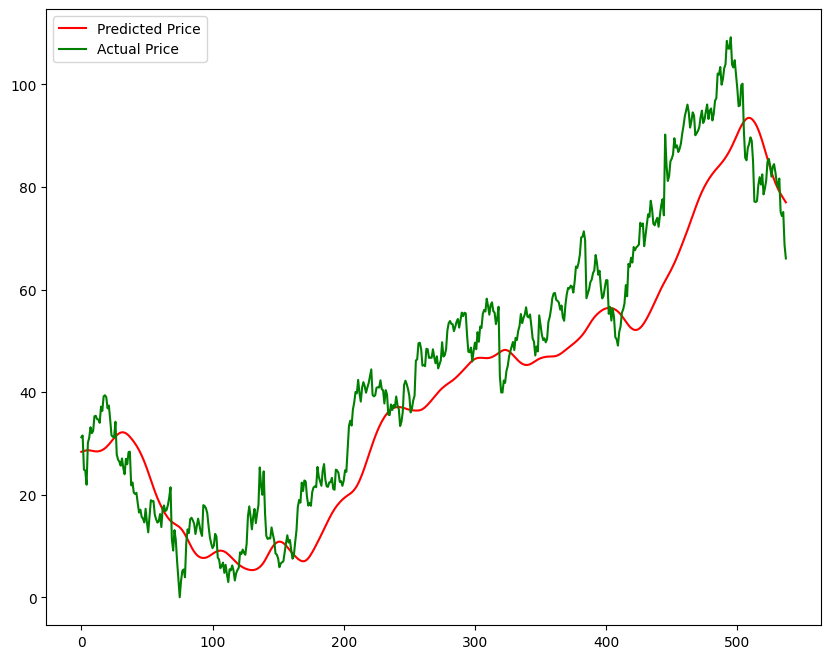

In [29]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Actual Price')
plt.legend()
plt.show()

In [30]:
model.save('Stock Predictions Model.keras')